<a href="https://colab.research.google.com/github/MedhaGuha8/Computer-Vision-A3-Segmentation-with-Super-Pixels/blob/main/A3_ECE_471_536_Spring_2024_MedhaGuha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![UVic logo](https://res-2.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1406151713/wptak6xuezyh36b1hbty.png)

# **ECE 471/536 Spring 2023: Computer Vision**
## Assignment 3: Segmentation with Super Pixels
### Due date: Monday March 11, 2024, 11:59pm


> Student: First Last, V00000000
---

## **1. Instructions:** follow the intructions provided in a sequential manner.
### 1.0 **Identification**
Please enter your name and V number on the text code above.

### 1.1 **Submission package**
Your final submission package must be submitted using the [BrightSpace](https://https://bright.uvic.ca/d2l/home)  platform. You will find this assignment's specific page under **Course Tools > Assignments**. Your submission package consists of a *.zip* file containing:

1.   *.ipynb* file: your modified version of this Google Colab template. Place your complete assignment solution/information in this version.  
2.   *.pdf* file: a document containing a writeup with the answers to mathematical questions.

### 1.2 **Coding considerations**
* In previous years we asked students to complete assignments offline by installing either MATLAB or a Python environment in their computers. In order to standardize the submissions and guarantee that everyone has access to the same Python environment, all assignments are going to be described (by us) and completed (by you) using the same Google Colab reference template script.
* Google Colab offers a Python environment that can be accessed in your browser and executed using Google Cloud, so no local installation is necessary. It makes the setting-up process significantly easier! Please read [this quick tutorial](https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb) notebook on Google Colab/Python.

### 1.3 **Creating your Google Colab submission file**

* Modify this template with your solutions to the assignment. You will find "**TO-DO**" indicators throughout the assingment highlighting portions of the code you are asked to complete.
* Only edit the provided templates in the bounds of the START TODO and END TODO flags.
* Colab notebooks are divided into individual cells. You can execute the code inside of a given cell by pressing **CTRL+ENTER**, or that of all cells by pressing **CTRL+F9**. Variables must be "executed" in a cell before being used by subsequent ones (the same goes for libraries imported). Note that some cells of this assignment contain flags that must by changed (and executed) before you move forward.
* If you completed the whole assignment, make sure that simply pressing "**CTRL+F9**" executes all cells correctly. **This is going to be the first marking step we will execute when evaluating your submission**.  

### 1.4 **Use of open source code**

* The use of small segments of freely-available code is permitted. However, it is **extremely important** that you indicate in your in-code comments where these are used, as well as their sources. Failure to do so can be considered plagiarism, which is a serious offence. Learn more about detection mechanisms and consequences of plagiarism at UVic [here](https://www.uvic.ca/library/research/citation/plagiarism/). Note that the programming assignments are designed so that most of their content should be created by you.     
* You can never include too many of these only too few.
* A number of functions/algorithms are already implemented by libraries we will use (e.g., [OpenCV](https://opencv.org/), [scikit-learn](https://scikit-learn.org/stable/)), however you should not use them unless otherwise instructed to do so. Mannualy coding some of these function is an important part of the learning process.  


In [ ]:
# ~~~~~~~START TODO~~~~~~~~~
READ_THE_INSTRUCTIONS_FLAG = False
# ~~~~~~~~END TODO~~~~~~~~~~

## **2. General Questions  (20 points)**

#### Answer all these questions in a separate pdf.

1. Show the normal representation of the line y = -2x + 1 (5 points)
2. Refering to Fig. 10.30 in your textbook, explain why the Hough mapping of the point labeled '1' in Fig 10.30(a) is a straight line in Fig. 10.30(b) (5 points)
3. Briefly explain what is meant by an L*a*b* color space ? (5 points)
4. Why does SLIC select the starting clusters not on a perfect grid but rather at the lowest gradient magnitude in a small neighborhood around the grid? (5 points)



# **3. Programming Questions (40 points)**

### **3.1 Basic image operations**


---



---


In [ ]:
import sys
import os
import cv2 # imports OpenCV
import numpy as np
from matplotlib import pyplot as plt #imports matplotlib
from google.colab.patches import cv2_imshow
from sklearn.mixture import GaussianMixture # Imports the Gaussian Mixture Model for this assignment
%matplotlib inline
# You will NOT need to import any more libraries for ANY assignment.


def pltImg(img, title=None, ori="horizontal", colorb = True):  # not mandatory, but useful
  plt.imshow(img)
  if colorb:
    plt.colorbar(orientation=ori)
  if title:
    plt.title(title)
  return plt

print('-'*40)
print ('Python version: {}'.format(sys.version))
print('OpenCV version: {}'.format(cv2.__version__))

READ_THE_INSTRUCTIONS_FLAG = True

if not READ_THE_INSTRUCTIONS_FLAG:
  raise Exception('Please go back and read the instructions.')
else:
  print('\nThank you for reading the instructions.')
print('-'*40)


# Here we simply download the needed image
if os.path.isfile('./super_pixel_target.jpg'):
  print('Image file already downloaded.')
else:
  !wget "https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/images/A1/super_pixel_target.jpg"



----------------------------------------
Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
OpenCV version: 4.8.0

Thank you for reading the instructions.
----------------------------------------
Image file already downloaded.


# **Superpixeling**

In this section we will be doing superpixeling based on the SLIC algorithm.

You can see the details of this algorithm in your text book AND at https://www.iro.umontreal.ca/~mignotte/IFT6150/Articles/SLIC_Superpixels.pdf.


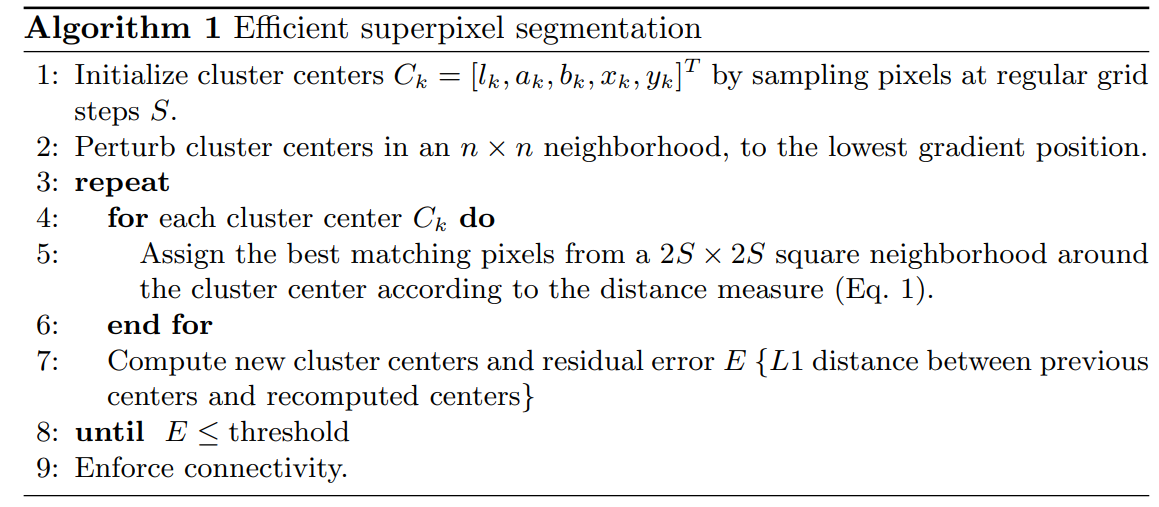


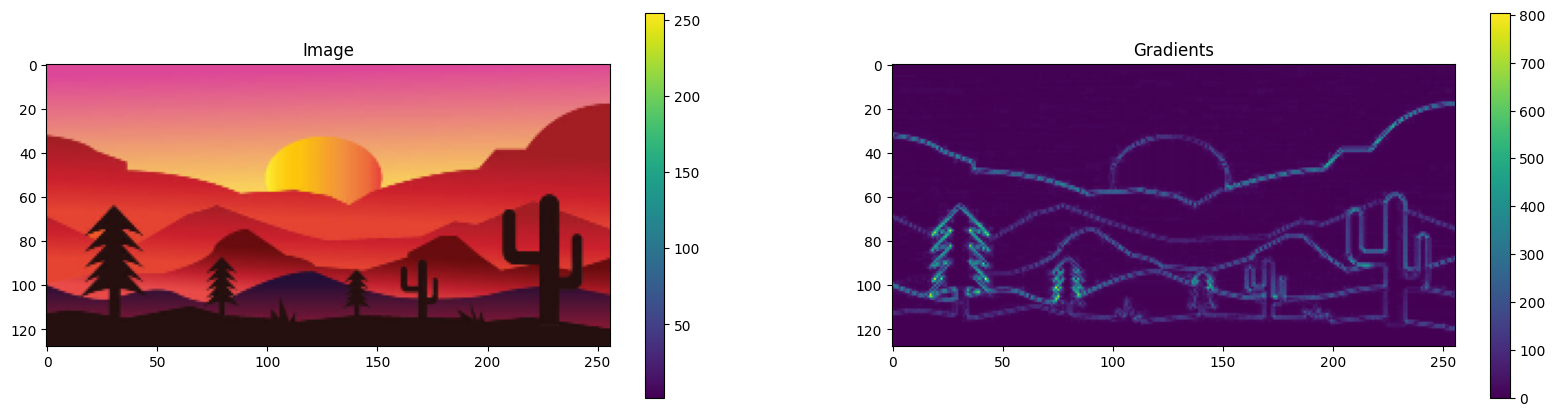

In [ ]:
# ~~~~~~~START TODO~~~~~~~~~
# (5 points): Load the image at './super_pixel_target.jpg'
# Resize the image to (256,128)
# Generate the Gradients for the image with cv2.Laplacian(,cv2.CV_64F) and
# take the absolute value of these gradients and sum them along the color channels.
# Convert the image to the LAB color space using cv2.cvtColor

img = cv2.imread('./super_pixel_target.jpg')
img = cv2.resize(img, (256, 128))

gradients = cv2.Laplacian(img, cv2.CV_64F)
gradients = np.abs(gradients).sum(axis=2)

LAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# ~~~~~~~~END TODO~~~~~~~~~~


plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
plt = pltImg(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),title="Image", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(gradients,title = "Gradients", ori='vertical')


Number of Clusters: 128


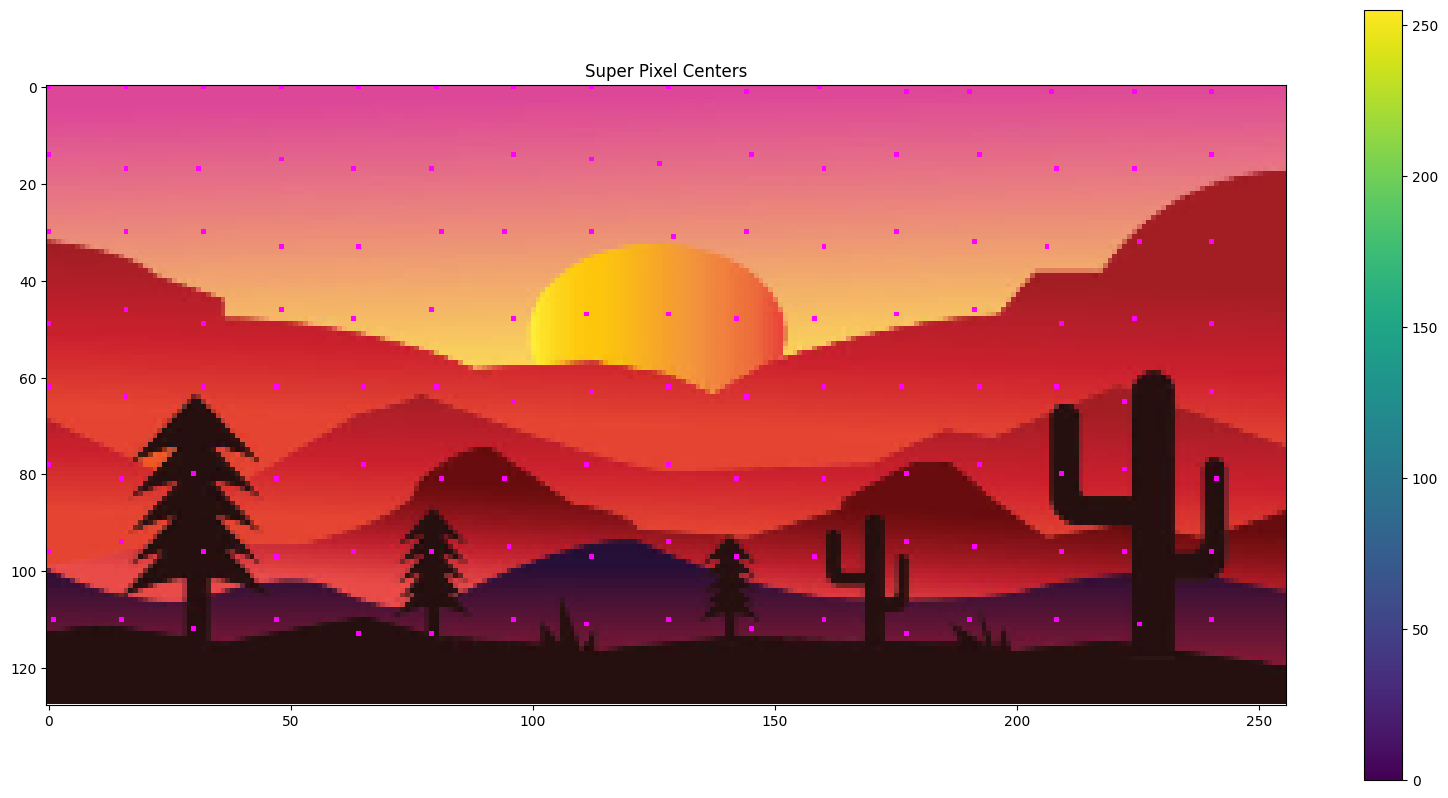

In [ ]:

def generate_intial_clusters(LAB, gradients, n_super_pixels, init_r):
  # ~~~~~~~START TODO~~~~~~~~~
  # (10 points): Generate the intial cluster centers for your method.
  # Each cluster center should be a list of the [L,A,B,x,y] where LAB are the
  # LAB color information of that starting cluster pixel and
  # the x,y are the inital center point of that cluster.
  # You sould derive the spaceing of these cluster centers
  # from the desired number of pixels where spacing = sqrt(n/n_super_pixels) where
  # n is the number of pixels in the image.
  # Once you have the equally spaced gid of pixels you should move the pixel up to
  # init_r pixels to the minimum gradient value in that neighborhood.

  n_rows, n_cols = LAB.shape[:2]
  n_pixels = n_rows * n_cols

  # Computing spacing
  spacing = np.sqrt(n_pixels / n_super_pixels)

  centers = []

  # Creating grid of initial center points
  for i in range(0, n_rows, int(spacing)):
        for j in range(0, n_cols, int(spacing)):
            # Getting LAB values at this grid point
            L, A, B = LAB[i, j]

            # Finding minimum gradient in neighborhood
            min_gradient = np.min(gradients[max(0, i - init_r):min(n_rows, i + init_r),
                                             max(0, j - init_r):min(n_cols, j + init_r)])

            # Finding coordinates of minimum gradient
            min_gradient_coords = np.argwhere(gradients == min_gradient)

            # Choosing the closest coordinate to the center
            min_gradient_coord = min_gradient_coords[np.argmin(np.linalg.norm(min_gradient_coords - [i, j], axis=1))]

            # Appending center to centers list
            centers.append([L, A, B, min_gradient_coord[0], min_gradient_coord[1]])


  # ~~~~~~~~END TODO~~~~~~~~~~
  return centers

centers = generate_intial_clusters(LAB, gradients, 128, 2)
print('Number of Clusters:', len(centers))
pixel_centers_inital = img.copy()
for center in centers:
  pixel_centers_inital[center[3],center[4]] = [255,0,255]
plt.figure(figsize = (20,10))
plt.subplot(1, 1, 1)
plt = pltImg(cv2.cvtColor(pixel_centers_inital,cv2.COLOR_BGR2RGB),title="Super Pixel Centers", ori='vertical')

In [ ]:
def do_super_pixel_clustering(LAB, init_clusters, itterations, m):
  # ~~~~~~~START TODO~~~~~~~~~
  # (25 points): In this function you will associate each pixel with its closest
  # clusters based on the intial clusters passed from your previous work.
  # The distance measure is equation 1 in the linked paper.
  # You do not need to normalize the LAB values or the distances.
  # This is incoperated into the selection of m.
  # The description of this loop is provided above in Algorithm 1 taken from the
  # SLIC paper.
  # Remeber s = sqrt(num_pixels/num_clusters)
  # You do not need to implement the functionality for enforcing connectivitiy.
  # You also do not need to check the L1 distance between the updates only itterate
  # 'intterations' times.
  # This function should recturn a numpy array of shape (h,w) where
  # the value at each point is the index to the intial_cluster it has been associated to
  # and a new list of cluster centers.
  # You can leave points without a cluster at a value of -1

   n_rows, n_cols = LAB.shape[:2]
   num_clusters = len(init_clusters)
   S = np.sqrt((n_rows * n_cols) / num_clusters)

   cluster_associations = np.full((n_rows, n_cols), -1, dtype=np.int32)
   distances = np.full((n_rows, n_cols), np.inf, dtype=np.float64)

   LAB = LAB.astype(np.float64)

   for it in range(itterations):
        new_clusters = []
        for k, center in enumerate(init_clusters):
            L, A, B, x, y = center
            x, y = int(x), int(y)

            for i in range(max(0, x - int(S)), min(n_rows, x + int(S))):
                for j in range(max(0, y - int(S)), min(n_cols, y + int(S))):
                    d_lab = np.sqrt((L - LAB[i, j, 0])**2 + (A - LAB[i, j, 1])**2 + (B - LAB[i, j, 2])**2)
                    d_xy = np.sqrt((x - i)**2 + (y - j)**2)
                    D = np.sqrt(d_lab**2 + (d_xy / S)**2 * (m**2))

                    if D < distances[i, j]:
                        distances[i, j] = D
                        cluster_associations[i, j] = k

        # Recomputing cluster centers
        for k in range(num_clusters):
            indices = np.where(cluster_associations == k)
            if len(indices[0]) > 0:
                L_mean = np.mean(LAB[indices][:, 0])
                A_mean = np.mean(LAB[indices][:, 1])
                B_mean = np.mean(LAB[indices][:, 2])
                x_mean = np.mean(indices[0])
                y_mean = np.mean(indices[1])
                new_clusters.append([L_mean, A_mean, B_mean, x_mean, y_mean])
            else:

                new_clusters.append(init_clusters[k])

  # ~~~~~~~~END TODO~~~~~~~~~~
   return cluster_associations, new_clusters





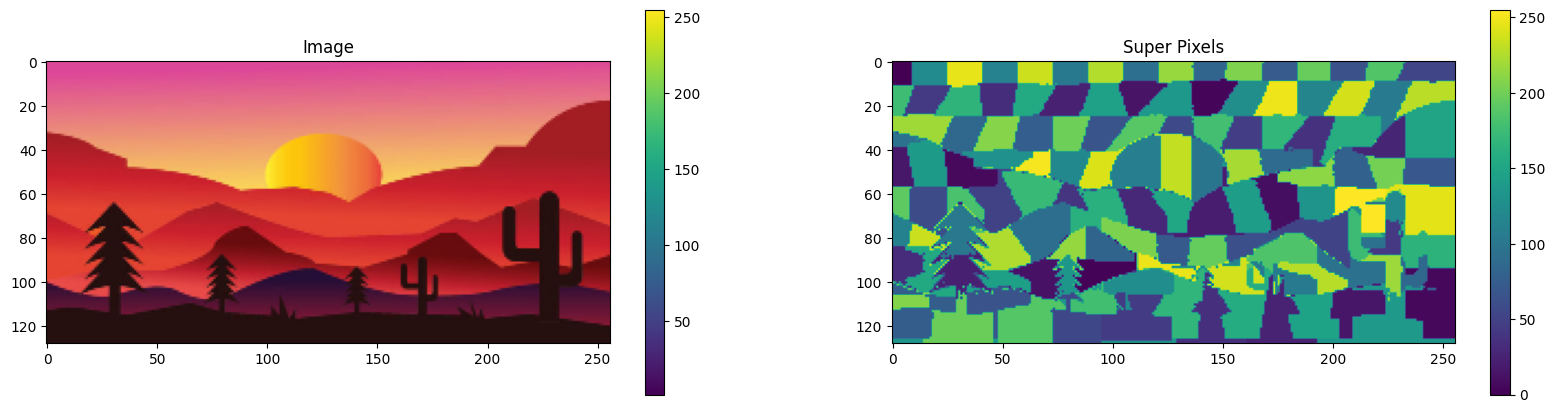

In [ ]:
cluster_associations, new_clusters = do_super_pixel_clustering(LAB, centers, 2, 10)
cluster_associations = (cluster_associations*123)%256

plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
plt = pltImg(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),title="Image", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(cluster_associations,title = "Super Pixels", ori='vertical')


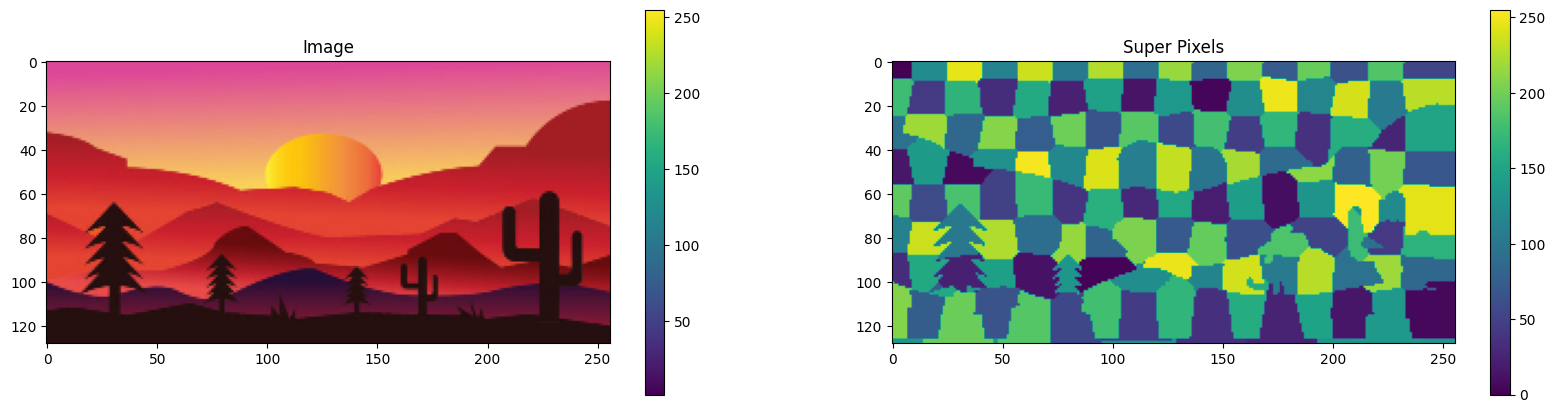

In [ ]:
cluster_associations, new_clusters = do_super_pixel_clustering(LAB, centers, 2, 100)
cluster_associations = (cluster_associations*123)%256

plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
plt = pltImg(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),title="Image", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(cluster_associations,title = "Super Pixels", ori='vertical')


**End of Assignment 3**